In [37]:
import pandas as pd
df=pd.read_csv('/content/dataset.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [38]:
numerical_columns = ['age', 'dur', 'num_calls']
df[numerical_columns].describe()

,age,dur,num_calls
count,45211.000000,45211.000000,45211.000000
mean,40.936210,258.163080,2.763841
std,10.618762,257.527812,3.098021
min,18.000000,0.000000,1.000000
25%,33.000000,103.000000,1.000000
50%,39.000000,180.000000,2.000000
75%,48.000000,319.000000,3.000000
max,95.000000,4918.000000,63.000000


In [39]:
df[numerical_columns].std()

,0
age,10.618762
dur,257.527812
num_calls,3.098021


<Axes: >

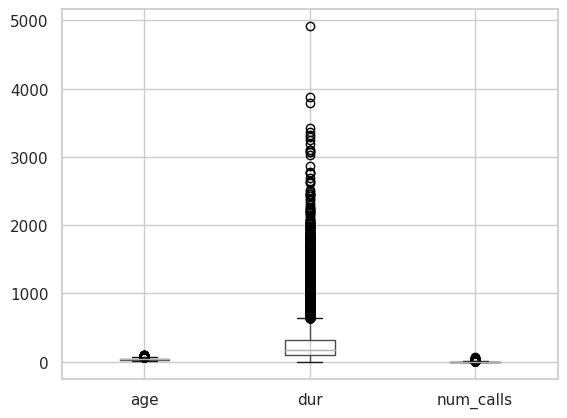

In [40]:
df.boxplot(column=numerical_columns)

In [41]:
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']
df[categorical_columns].value_counts()

job          marital  education_qual  call_type  prev_outcome
management   married  tertiary        cellular   unknown         2530
technician   married  secondary       cellular   unknown         1514
management   single   tertiary        cellular   unknown         1488
blue-collar  married  secondary       unknown    unknown         1443
                                      cellular   unknown         1412
                                                                 ... 
housemaid    married  unknown         cellular   success            1
                      tertiary        telephone  other              1
                                                 failure            1
                      secondary       telephone  success            1
retired      married  secondary       unknown    failure            1
Name: count, Length: 937, dtype: int64

In [42]:
df.groupby('y')[numerical_columns].mean()

,age,dur,num_calls
y,,,
no,40.838986,221.182806,2.846350
yes,41.670070,537.294574,2.141047


In [43]:
df.groupby('y')[categorical_columns].value_counts(normalize=True)

y    job          marital   education_qual  call_type  prev_outcome
no   management   married   tertiary        cellular   unknown         0.056460
     blue-collar  married   secondary       unknown    unknown         0.034718
     technician   married   secondary       cellular   unknown         0.034367
     blue-collar  married   secondary       cellular   unknown         0.032188
     management   single    tertiary        cellular   unknown         0.031361
                                                                         ...   
yes  student      single    tertiary        unknown    unknown         0.000189
                                            telephone  other           0.000189
     housemaid    single    secondary       unknown    unknown         0.000189
     retired      divorced  tertiary        cellular   other           0.000189
     services     single    secondary       telephone  other           0.000189
Name: proportion, Length: 1447, dtype: float64

In [44]:
missing_values = df.isnull().sum()
print(missing_values)

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64


In [45]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


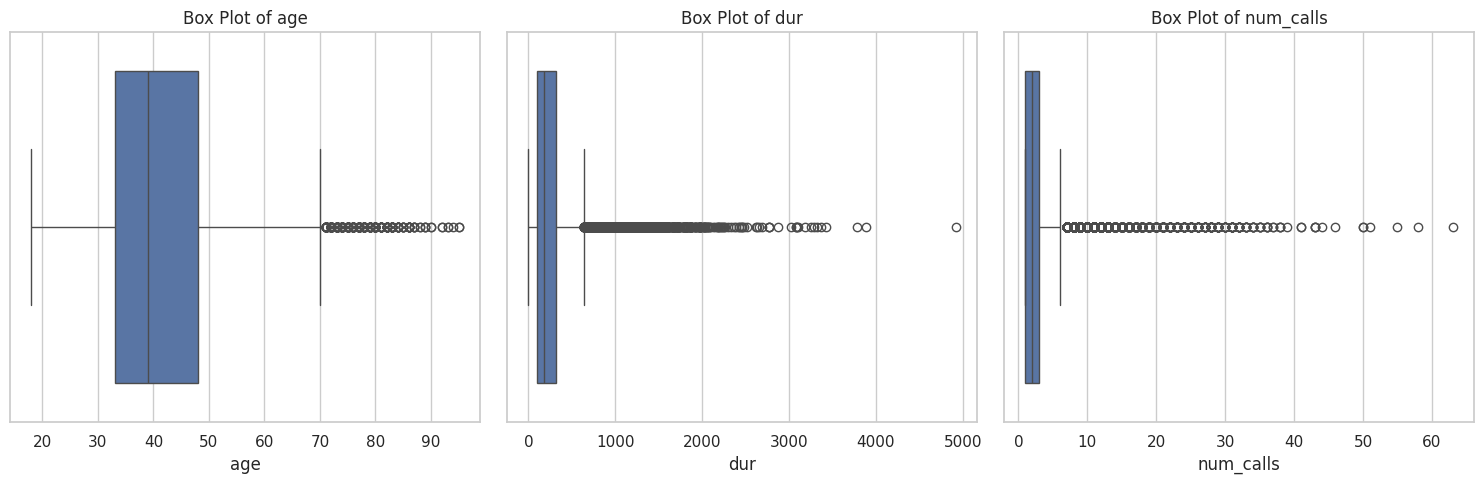

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['age', 'dur', 'num_calls']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

In [47]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['age', 'dur', 'num_calls']]))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

print("Number of outliers detected:", np.sum(outliers))
print(df[outliers])

Number of outliers detected: 2164
       age          job   marital education_qual call_type  day  mon   dur  \
37      53   technician   married      secondary   unknown    5  may  1666   
43      54      retired   married      secondary   unknown    5  may  1492   
59      46     services   married        primary   unknown    5  may  1778   
83      59       admin.   married      secondary   unknown    5  may  1042   
86      56       admin.   married      secondary   unknown    5  may  1467   
...    ...          ...       ...            ...       ...  ...  ...   ...   
45191   75      retired  divorced       tertiary  cellular   16  nov   262   
45199   34  blue-collar    single      secondary  cellular   16  nov  1166   
45200   38   technician   married      secondary  cellular   16  nov  1556   
45204   73      retired   married      secondary  cellular   17  nov   300   
45208   72      retired   married      secondary  cellular   17  nov  1127   

       num_calls prev_outcome

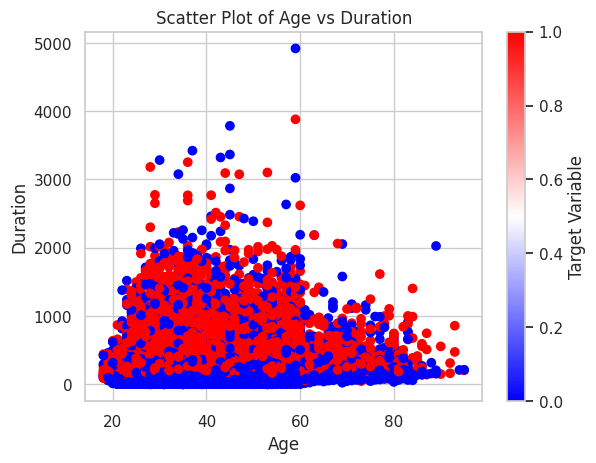

In [48]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['dur'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0), cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Scatter Plot of Age vs Duration')
plt.colorbar(label='Target Variable')
plt.show()

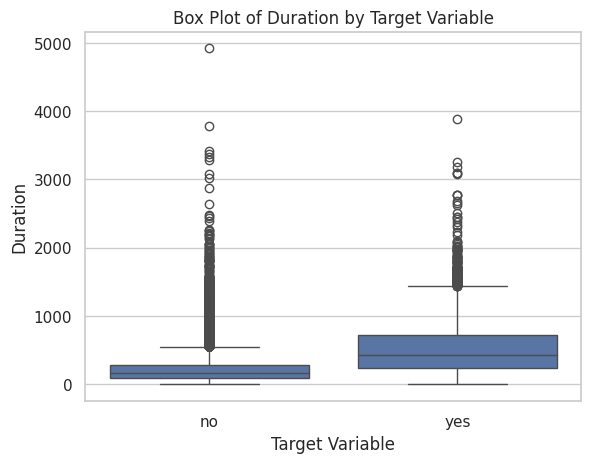

In [49]:
import seaborn as sns

sns.boxplot(x=df['y'], y=df['dur'])
plt.xlabel('Target Variable')
plt.ylabel('Duration')
plt.title('Box Plot of Duration by Target Variable')
plt.show()

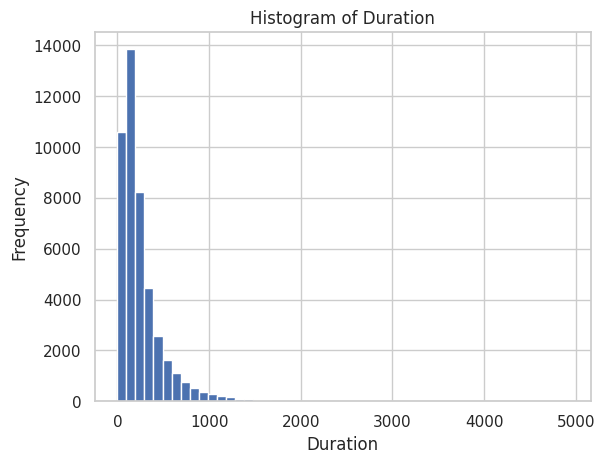

In [50]:
plt.hist(df['dur'], bins=50)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

In [51]:
for column in ['age', 'dur', 'num_calls']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

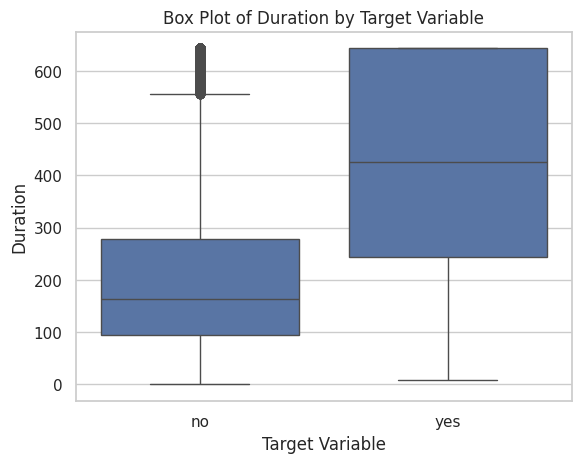

In [52]:
import seaborn as sns

sns.boxplot(x=df['y'], y=df['dur'])
plt.xlabel('Target Variable')
plt.ylabel('Duration')
plt.title('Box Plot of Duration by Target Variable')
plt.show()

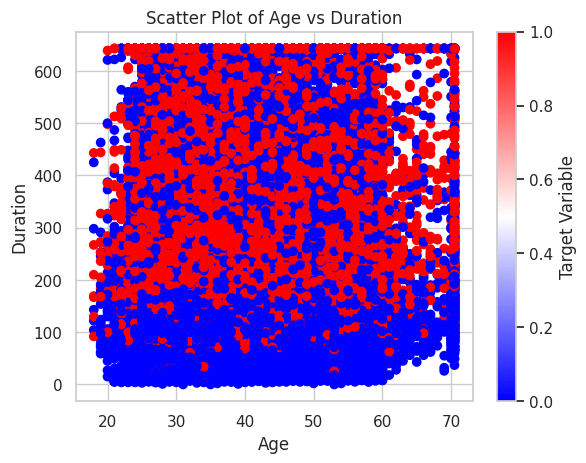

In [53]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['dur'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0), cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Scatter Plot of Age vs Duration')
plt.colorbar(label='Target Variable')
plt.show()

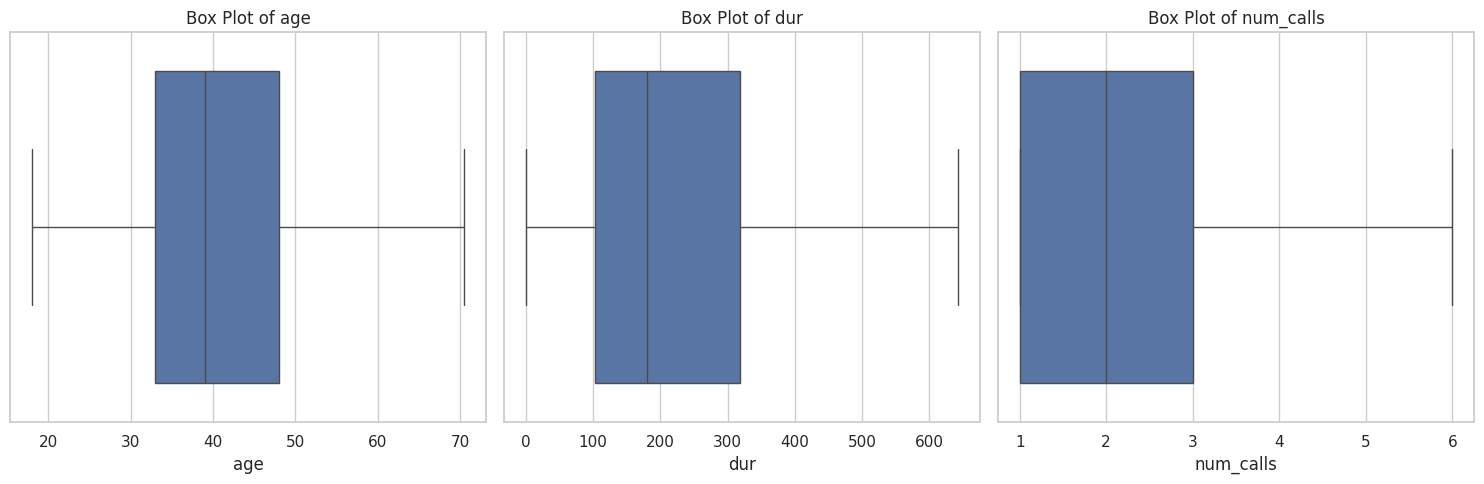

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['age', 'dur', 'num_calls']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

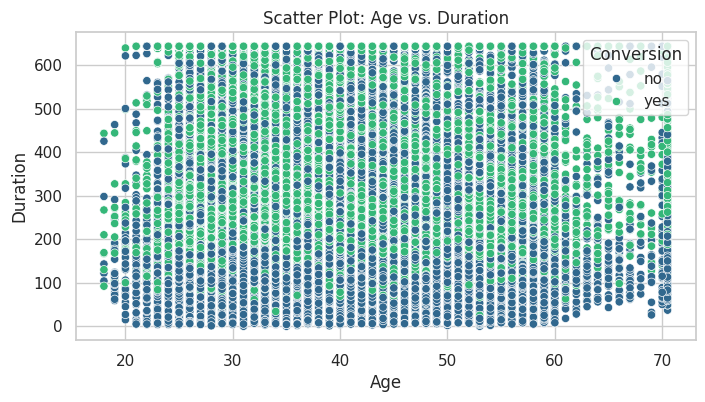

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='age', y='dur', hue='y', palette='viridis')
plt.title('Scatter Plot: Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.legend(title='Conversion')
plt.show()

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['education_qual'] = label_encoder.fit_transform(df['education_qual'])

df['y'] = label_encoder.fit_transform(df['y'])

df = pd.get_dummies(df, columns=['job', 'marital', 'call_type', 'day',
                                 'mon', 'prev_outcome'], drop_first=True)

df = df.astype(int)

print(df.head())
print(df.dtypes)

   age  education_qual  dur  num_calls  y  job_blue-collar  job_entrepreneur  \
0   58               2  261          1  0                0                 0   
1   44               1  151          1  0                0                 0   
2   33               1   76          1  0                0                 1   
3   47               3   92          1  0                1                 0   
4   33               3  198          1  0                0                 0   

   job_housemaid  job_management  job_retired  ...  mon_jul  mon_jun  mon_mar  \
0              0               1            0  ...        0        0        0   
1              0               0            0  ...        0        0        0   
2              0               0            0  ...        0        0        0   
3              0               0            0  ...        0        0        0   
4              0               0            0  ...        0        0        0   

   mon_may  mon_nov  mon_oct  mo

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.62
Recall: 0.35
F1 Score: 0.45


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
coefficients = model.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

specific_features = ['age', 'num_calls', 'dur']
coef_df_filtered = coef_df[coef_df['Feature'].isin(specific_features)]

print(coef_df_filtered)

     Feature  Coefficient
0        age     0.004415
2        dur     0.007091
3  num_calls    -0.116820


In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_test_pred, pos_label=1)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_test_pred, pos_label=1)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.63
Recall: 0.39
F1 Score: 0.49


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_test_pred, pos_label=1)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_test_pred, pos_label=1)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_test_pred, pos_label=1)

Accuracy: 0.90
Precision: 0.63
Recall: 0.39


In [61]:
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

specific_features = ['age', 'dur', 'num_calls']
importance_df_filtered = importance_df[importance_df['Feature'].isin(specific_features)]

print(importance_df_filtered)

     Feature  Importance
0        age    0.129901
2        dur    0.269180
3  num_calls    0.050394


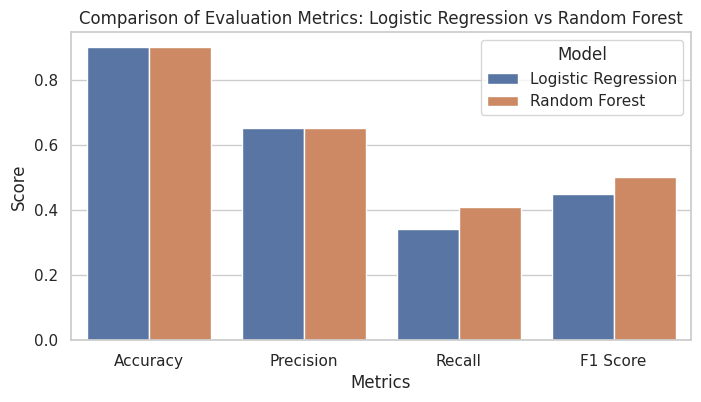

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_regression = [0.90, 0.65, 0.34, 0.45]
random_forest = [0.90, 0.65, 0.41, 0.50]

data = pd.DataFrame({
    'Metrics': metrics,
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest
})

data_melted = pd.melt(data, id_vars='Metrics',
                      value_vars=['Logistic Regression', 'Random Forest'],
                      var_name='Model', value_name='Score')

plt.figure(figsize=(8, 4))
sns.barplot(x='Metrics', y='Score', hue='Model', data=data_melted)

plt.title('Comparison of Evaluation Metrics: Logistic Regression vs Random Forest')
plt.ylabel('Score')
plt.xlabel('Metrics')

plt.show()